In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
import tensorflow as tf

from keras.callbacks import History 

from keras.layers import Input, Dropout, Dense, TimeDistributed, LSTM, RepeatVector
from keras.models import Model
from keras import regularizers
data = pd.read_csv("C:/Users/QWERTY/Desktop/MachineLearning/creditcard.csv")



C:\Users\QWERTY\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


In [2]:
X = data.drop('Class', axis = 1)
y = data.Class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3333, random_state=0)

In [3]:
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape: ", X_train.shape)


Training data shape:  (189880, 1, 30)


In [4]:
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Training data shape: ", X_test.shape)

Training data shape:  (94927, 1, 30)


In [23]:
def autoencoder_model(X):
    inputs = Input(shape= (X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
             kernel_regularizer = regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='softmax', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(16, activation='relu',return_sequences=True)(L3)
    L5 = LSTM(16, activation='sigmoid',return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [24]:
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 30)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 16)             3008      
_________________________________________________________________
lstm_10 (LSTM)               (None, 4)                 336       
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 1, 4)              0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 1, 16)             1344      
_________________________________________________________________
lstm_12 (LSTM)               (None, 1, 16)             2112      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 30)             510 

In [26]:
epoch = 10
batch_size = 32
history = model.fit(X_train, X_train, epochs = epoch, validation_split=0.05, batch_size = batch_size).history

Train on 180386 samples, validate on 9494 samples
Epoch 1/10
180386/180386 [==============================] - 127s 705us/step - loss: 3152.6156 - accuracy: 0.9996 - val_loss: 3168.1877 - val_accuracy: 0.9997
Epoch 2/10
180386/180386 [==============================] - 142s 785us/step - loss: 3150.2377 - accuracy: 0.9996 - val_loss: 3165.8107 - val_accuracy: 0.9997
Epoch 3/10
180386/180386 [==============================] - 134s 743us/step - loss: 3147.8611 - accuracy: 0.9996 - val_loss: 3163.4346 - val_accuracy: 0.9997
Epoch 4/10
180386/180386 [==============================] - 125s 692us/step - loss: 3145.4863 - accuracy: 0.9996 - val_loss: 3161.0608 - val_accuracy: 0.9997
Epoch 5/10
180386/180386 [==============================] - 129s 713us/step - loss: 3143.1137 - accuracy: 0.9996 - val_loss: 3158.6887 - val_accuracy: 0.9997
Epoch 6/10
180386/180386 [==============================] - 124s 685us/step - loss: 3140.7419 - accuracy: 0.9996 - val_loss: 3156.3179 - val_accuracy: 0.9997
Ep

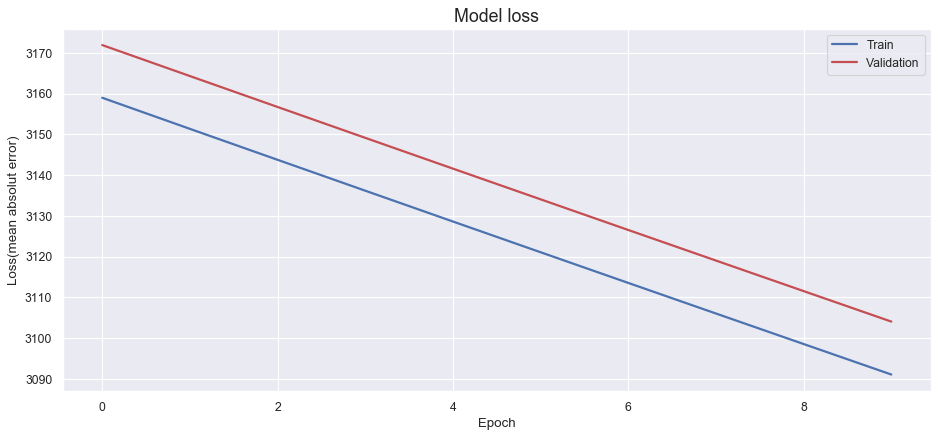

In [8]:
#plot the training losses 
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label = 'Train', linewidth = 2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth = 2)
ax.set_title('Model loss', fontsize = 16)
ax.set_ylabel('Loss(mean absolut error)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()


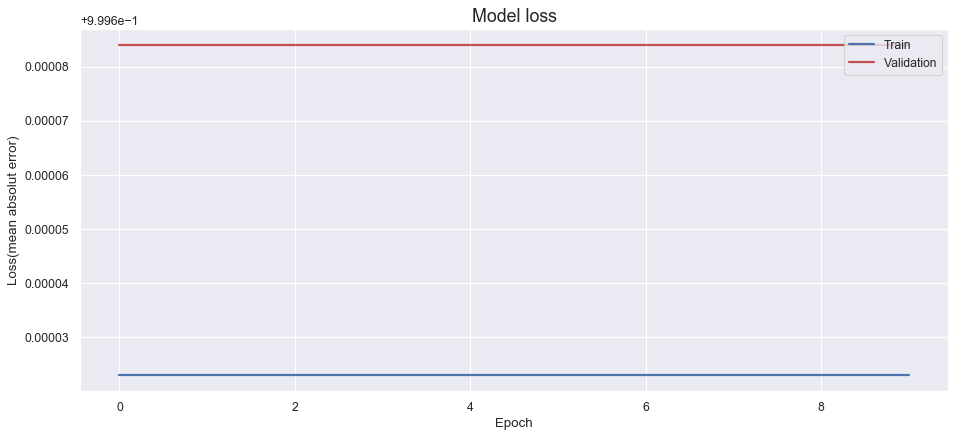

In [28]:
# plot the accuracy during training
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['accuracy'], 'b', label = 'Train', linewidth = 2)
ax.plot(history['val_accuracy'], 'r', label='Validation', linewidth = 2)
ax.set_title('Model loss', fontsize = 16)
ax.set_ylabel('Loss(mean absolut error)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()